In [1]:
import pandas as pd


df = pd.read_csv('imdb-reviews-pt-br.csv')
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
df.tail()

,id,text_en,text_pt,sentiment
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos


In [3]:
print(df.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [4]:
map = {
    'neg': 0,
    'pos': 1
}
df['sentiment'].replace(map, inplace=True)
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


In [5]:
import numpy as np


text_sample = df.text_pt[np.random.choice(len(df), 3)]
text_sample

31356    Enquanto o original excita o intelecto, este r...
38775    É uma verdadeira vergonha que esta série de TV...
19827    Nem sempre é certo que, misturando os comedian...
Name: text_pt, dtype: object

In [6]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(text_sample)

In [7]:
vectorizer.get_feature_names()

['1930',
 '70',
 'absurdo',
 'acabado',
 'acabou',
 'aceitando',
 'acidentalmente',
 'acompanhar',
 'admirar',
 'adoram',
 'afetado',
 'afiado',
 'age',
 'agindo',
 'agradáveis',
 'agressivo',
 'aguentar',
 'ah',
 'ainda',
 'aleatórias',
 'algumas',
 'alguns',
 'alguém',
 'alison',
 'allan',
 'altamente',
 'além',
 'amadora',
 'ameaça',
 'ameaças',
 'and',
 'angustiante',
 'animava',
 'ann',
 'anos',
 'ansiosa',
 'ao',
 'aparecer',
 'aparentemente',
 'apareçam',
 'apelido',
 'apenas',
 'apresenta',
 'apresentavam',
 'aproveite',
 'arma',
 'artistas',
 'as',
 'assassinatos',
 'assassino',
 'assemelha',
 'assim',
 'assista',
 'assistir',
 'astuto',
 'atentamente',
 'atingido',
 'atividades',
 'ato',
 'ator',
 'atores',
 'até',
 'austero',
 'bacanas',
 'balançar',
 'barato',
 'basicamente',
 'bem',
 'bilhar',
 'bizarro',
 'bobos',
 'bola',
 'boland',
 'bradley',
 'brilhante',
 'brilho',
 'bruxas',
 'burns',
 'buster',
 'cabeça',
 'cada',
 'caine',
 'cair',
 'campos',
 'carl',
 'carls',
 '

In [8]:
bow_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                     columns = vectorizer.get_feature_names())

In [9]:
bow_matrix.head()

,1930,70,absurdo,acabado,acabou,aceitando,acidentalmente,acompanhar,admirar,adoram,...,william,wynn,xerife,yorkshire,zesty,zumbis,ícone,últimos,única,único
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,2,1,0,1,1,1,1,1,1,1
2,1,0,0,1,1,0,1,1,1,0,...,0,0,2,0,0,0,0,0,0,2


In [10]:
vectorizer = CountVectorizer(lowercase=False, max_features=300)
bag_of_words = vectorizer.fit_transform(df.text_pt)
bag_of_words.shape

(49459, 300)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def classify_text(text, x, y):
    vectorizer = CountVectorizer(lowercase=False, max_features=300)
    bag_of_words = vectorizer.fit_transform(text[x])
    
    x_train, x_test, y_train, y_test = train_test_split(bag_of_words,  
                                                        text[y],random_state=13)
    
    reg = LogisticRegression(max_iter=1e4)
    reg.fit(x_train, y_train)
    acc = reg.score(x_test, y_test)
    return acc

print(classify_text(df, 'text_pt', 'sentiment'))

0.7963606955115244


In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud



list_of_words = ' '.join([word for word in df.text_pt])
word_cloud = WordCloud(max_font_size=100, collocations=False).generate(list_of_words)

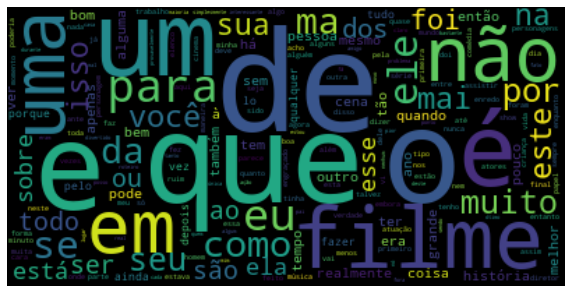

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
def segmented_wcloud(df, column, x):
    query = "sentiment == " + str(x) 
    texts = df.query(query)
    
    
    list_of_words = ' '.join([word for word in df[column]])
    word_cloud = WordCloud(max_font_size=100, collocations=False).generate(list_of_words)
    plt.figure(figsize=(10,6))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

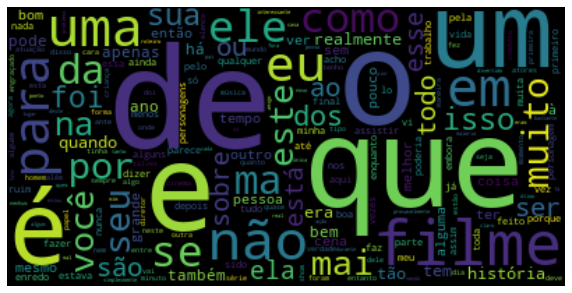

In [16]:
segmented_wcloud(df, 'text_pt', 0)

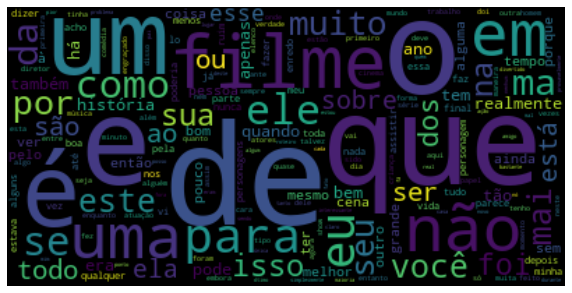

In [17]:
segmented_wcloud(df, 'text_pt', 1)

In [18]:
import nltk

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [19]:
sample = df.text_pt[np.random.choice(len(df))]
print(sample)

Eu vi este filme às quintas-feiras à noite depois de ter um dia muito chato. Eu não tinha expectativas, as que eu tinha eram bastante negativas. Sendo que o único filme que eu já assisti Jimmy é a versão americana de Taxi com Queen Latifah? ... não pergunte o porquê! Mas a sério .. este filme é tão fofo! Drew Barrymore é sempre doce, mas eu quase me apaixonei pelo personagem de Fallon. Por que não posso conhecer um nerd fofo assim? : Filmes como esse são excelentes. Simples, doce e necessário. Domingo às quintas-feiras. Eu nem sou fã de esportes, mas é algo sobre filmes americanos com beisebol que me fascina. Provavelmente o fato de que nós não temos esse esporte aqui na Noruega. Meu primeiro comentário nunca. Haha


In [20]:
from nltk import tokenize


token_whitespace = tokenize.WhitespaceTokenizer()
print(token_whitespace.tokenize(sample))

['Eu', 'vi', 'este', 'filme', 'às', 'quintas-feiras', 'à', 'noite', 'depois', 'de', 'ter', 'um', 'dia', 'muito', 'chato.', 'Eu', 'não', 'tinha', 'expectativas,', 'as', 'que', 'eu', 'tinha', 'eram', 'bastante', 'negativas.', 'Sendo', 'que', 'o', 'único', 'filme', 'que', 'eu', 'já', 'assisti', 'Jimmy', 'é', 'a', 'versão', 'americana', 'de', 'Taxi', 'com', 'Queen', 'Latifah?', '...', 'não', 'pergunte', 'o', 'porquê!', 'Mas', 'a', 'sério', '..', 'este', 'filme', 'é', 'tão', 'fofo!', 'Drew', 'Barrymore', 'é', 'sempre', 'doce,', 'mas', 'eu', 'quase', 'me', 'apaixonei', 'pelo', 'personagem', 'de', 'Fallon.', 'Por', 'que', 'não', 'posso', 'conhecer', 'um', 'nerd', 'fofo', 'assim?', ':', 'Filmes', 'como', 'esse', 'são', 'excelentes.', 'Simples,', 'doce', 'e', 'necessário.', 'Domingo', 'às', 'quintas-feiras.', 'Eu', 'nem', 'sou', 'fã', 'de', 'esportes,', 'mas', 'é', 'algo', 'sobre', 'filmes', 'americanos', 'com', 'beisebol', 'que', 'me', 'fascina.', 'Provavelmente', 'o', 'fato', 'de', 'que', 'nó

In [21]:
token_texts = token_whitespace.tokenize(list_of_words)
freqs = nltk.FreqDist(token_texts)
df_freq = pd.DataFrame({'Words': list(freqs.keys()),
                        'Frequency': list(freqs.values())})
df_freq.sort_values('Frequency', ascending=False)

,Words,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
...,...,...
202546,Delvian;,1
202548,Henson;,1
202549,FarScape,1
49483,Ghencea.,1


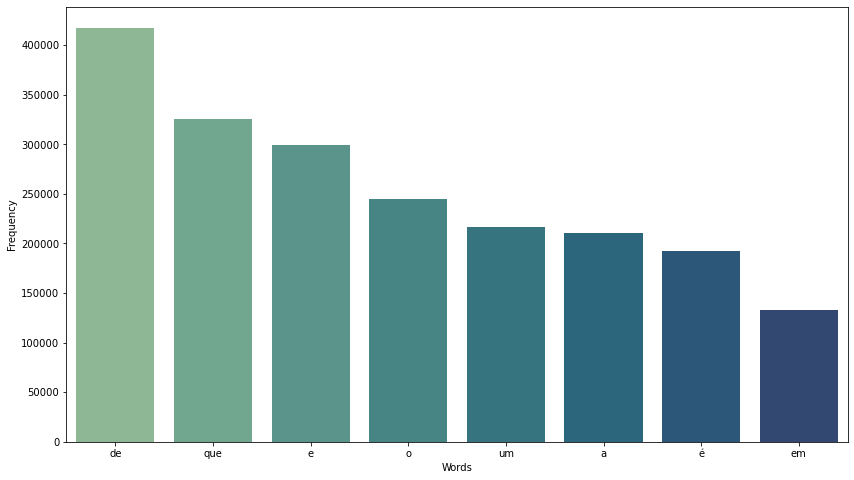

In [22]:
import seaborn as sns


plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_freq.sort_values('Frequency', ascending=False).head(8),
                 x='Words', y='Frequency',palette='crest')

In [23]:
stopwords = nltk.corpus.stopwords.words('portuguese')

preprocessed_text = []
for text in df.text_pt:
    new_text = []
    words = token_whitespace.tokenize(text)
    for word in words:
        if word not in stopwords:
            new_text.append(word)
    preprocessed_text.append(' '.join(new_text))
     
df['preprocessed'] = preprocessed_text
df.head()

,id,text_en,text_pt,sentiment,preprocessed
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [24]:
classify_text(df, 'preprocessed', 'sentiment')

0.8011322280630813

In [25]:
from nltk import tokenize


punctuation_token = tokenize.WordPunctTokenizer()
token_txt = punctuation_token.tokenize('não, sim, isso, fim!')
token_txt

['não', ',', 'sim', ',', 'isso', ',', 'fim', '!']

In [26]:
example_1 = ['this', 'is', 'a', 'phrase']
example_2 = 'To be or no to be'
example_3 = 'Doubt that the stars are fire'

#Join list of words
print(' '.join(example_1))
#Join list of strings
print(' '.join([text for text in [example_2, example_3]]))

this is a phrase
To be or no to be Doubt that the stars are fire


In [27]:
from string import punctuation


punct_list = [x for x in punctuation]
stopwords = punct_list + stopwords

processed_text = []

for text in df['preprocessed']:
    new_text = []
    txt_words = punctuation_token.tokenize(text)
    for word in txt_words:
        if word not in stopwords:
            new_text.append(word)
    processed_text.append(' '.join(new_text))

df['processed_1'] = processed_text
df.head()

,id,text_en,text_pt,sentiment,preprocessed,processed_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [28]:
import unidecode


stopwords= [unidecode.unidecode(txt) for txt in stopwords]

In [29]:
processed_text = []
no_accent = [unidecode.unidecode(txt) for txt in df['processed_1']]

for text in no_accent:
    new_text = []
    txt_words = punctuation_token.tokenize(text)
    for word in txt_words:
        if word not in stopwords:
            new_text.append(word)
    processed_text.append(' '.join(new_text))

df['processed_2'] = processed_text

In [30]:
print('No preprocess: ', classify_text(df, 'text_pt', 'sentiment'))
print('Removing stopwords: ', classify_text(df, 'preprocessed', 'sentiment'))
print('Removing punctuation: ', classify_text(df, 'processed_1', 'sentiment'))
print('Removing accents: ', classify_text(df, 'processed_2', 'sentiment'))

No preprocess:  0.7963606955115244
Removing stopwords:  0.8011322280630813
Removing punctuation:  0.8011322280630813
Removing accents:  0.8012131014961585


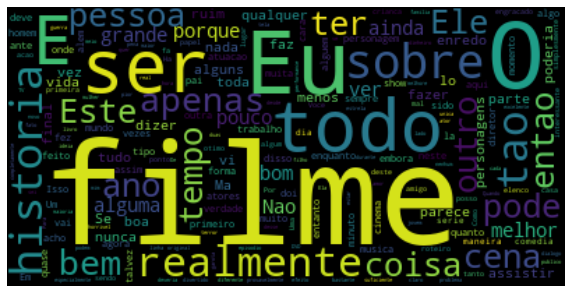

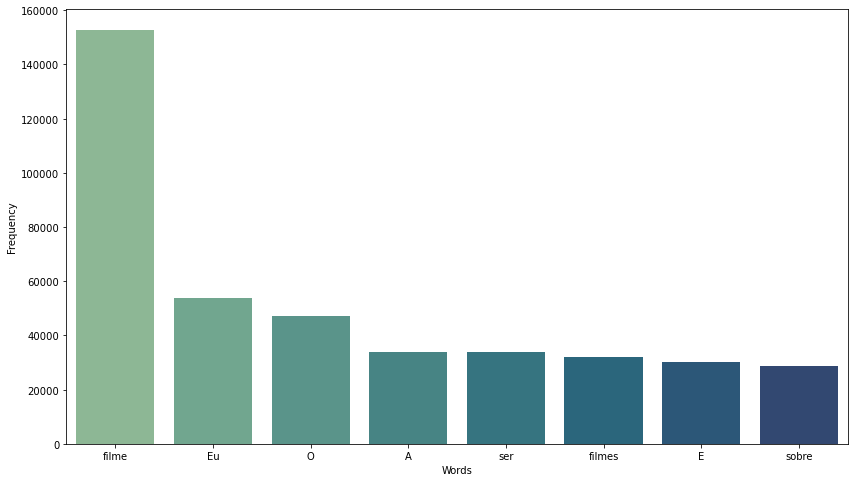

In [31]:
def view_most_frequent_words(df, column):
    list_of_words = ' '.join([text for text in df[column]])
    token_texts = token_whitespace.tokenize(list_of_words)
    freqs = nltk.FreqDist(token_texts)
    df_freq = pd.DataFrame({'Words': list(freqs.keys()),
                            'Frequency': list(freqs.values())})
    df_freq.sort_values('Frequency', ascending=False)
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(data=df_freq.sort_values('Frequency', ascending=False).head(8),
                     x='Words', y='Frequency',palette='crest')

    
segmented_wcloud(df, 'processed_2', 1)
view_most_frequent_words(df, 'processed_2')

In [32]:
processed_text = []
for text in df['processed_3']:
    new_text = []
    text = text.lower()
    txt_words = punctuation_token.tokenize(text)
    for word in txt_words:
        if word not in stopwords:
            new_text.append(word)
    processed_text.append(' '.join(new_text))
df['processed_3'] = processed_text

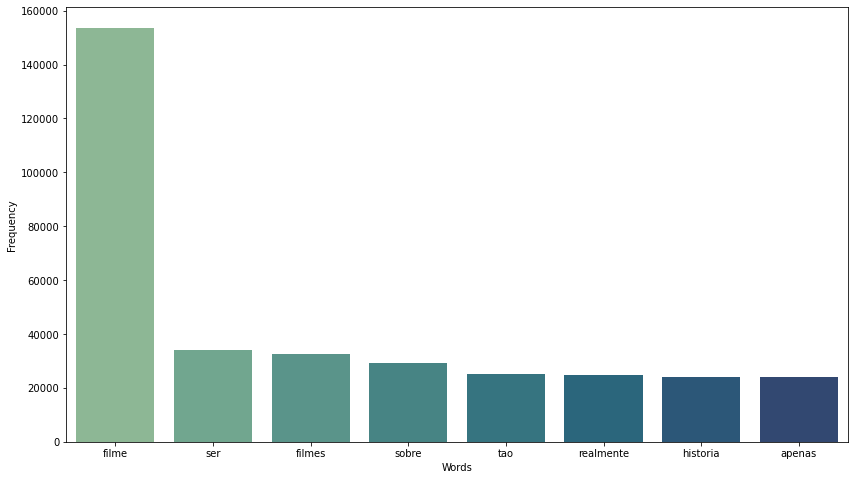

In [33]:
view_most_frequent_words(df, 'processed_3')

In [35]:
from nltk.stem import RSLPStemmer


stemmer = RSLPStemmer()

processed_text = []
for text in df['processed_3']:
    new_text = []
    txt_words = punctuation_token.tokenize(text)
    for word in txt_words:
        if word not in stopwords:
            new_text.append(stemmer.stem(word))
    processed_text.append(' '.join(new_text))

df['processed_4'] = processed_text

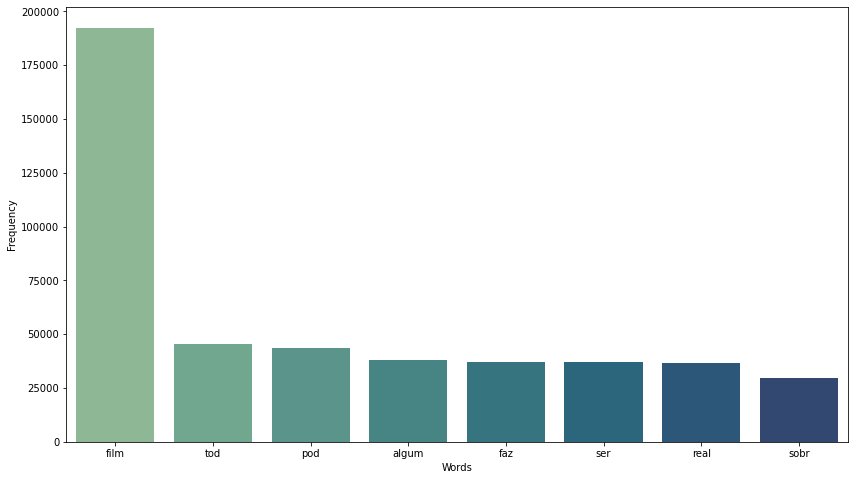

In [36]:
view_most_frequent_words(df, 'processed_4')

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(lowercase=False, max_features=300)

tfidf_matrix = tfidf.fit_transform(df['processed_4'])
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix,
                                                   df['sentiment'],
                                                  random_state=13)
reg = LogisticRegression(max_iter=1e4)
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))

0.8215932066316215


In [61]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,3), max_features=300)
tfidf_matrix = tfidf.fit_transform(df['processed_4'])

x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix,
                                                   df['sentiment'],
                                                  random_state=13)
reg = LogisticRegression(max_iter=1e4)
reg.fit(x_train, y_train)
print(reg.score(x_test, y_test))

0.8224828143954711


In [49]:
text_data = pd.DataFrame(
    data = reg.coef_[0].T,
    columns = ['TFIDF'],
    index = tfidf.get_feature_names()
)

In [58]:
text_data.sort_values('TFIDF', ascending=False)

,TFIDF
excel,6.556790
otim,6.100850
perfeit,5.794929
maravilh,4.965247
incri,3.997176
...,...
terri,-6.192969
chat,-6.691109
horri,-7.069237
pi,-7.243474
